In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# 1. Load the dataset
df = pd.read_csv("CarPrice_Assignment.csv")

In [32]:
# 1b. Display first 5 rows
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [33]:
# 1c. Display shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 205 rows and 26 columns.


In [34]:
# 1d. Display data types
print(df.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [35]:
# 1e. Check for missing values
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [36]:
# 1f. Display basic statistical details
print(df.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [37]:
# 2. Feature Selection
features = ["enginesize", "horsepower", "carwidth", "curbweight", "highwaympg"]
target = "price"
X = df[features]
y = df[target]

In [38]:

# Convert horsepower to numeric if necessary
X["horsepower"] = pd.to_numeric(X["horsepower"], errors='coerce')
X.fillna(X.mean(), inplace=True)  # Handle missing values

/var/folders/4s/469p4rwd60xgtx_fjxkh_5940000gn/T/ipykernel_5197/4134046593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["horsepower"] = pd.to_numeric(X["horsepower"], errors='coerce')
/var/folders/4s/469p4rwd60xgtx_fjxkh_5940000gn/T/ipykernel_5197/4134046593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # Handle missing values


In [39]:
# 3. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (164, 5), Testing set: (41, 5)


In [40]:
# 4b. Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Regression Coefficients:", ridge.coef_)
print("Ridge Regression Intercept:", ridge.intercept_)

Ridge Regression Coefficients: [ 80.20352725  50.30816498 627.12414946   1.69885907 -40.34665079]
Ridge Regression Intercept: -46633.94571097826


In [41]:
# 4c. Train Lasso Regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print("Lasso Regression Coefficients:", lasso.coef_)
print("Lasso Regression Intercept:", lasso.intercept_)

Lasso Regression Coefficients: [ 80.20414245  50.30764533 629.32699505   1.69126671 -40.33241164]
Lasso Regression Intercept: -46760.21223361015


In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Define models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

# Train models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Store models in dictionary
models = {"Linear Regression": lr, "Ridge Regression": ridge, "Lasso Regression": lasso}


In [43]:
# 5. Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

results = {}

for name, model in models.items():
    rmse, r2 = evaluate_model(model, X_test, y_test)
    results[name] = {"RMSE": rmse, "R² Score": r2}
    print(f"{name} -> RMSE: {rmse:.2f}, R² Score: {r2:.2f}")

Linear Regression -> RMSE: 3816.53, R² Score: 0.82
Ridge Regression -> RMSE: 3816.24, R² Score: 0.82
Lasso Regression -> RMSE: 3816.36, R² Score: 0.82


In [44]:
# 6. Experimenting with different alpha values for Ridge and Lasso
alphas = [0.1, 5, 10]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_rmse, ridge_r2 = evaluate_model(ridge, X_test, y_test)
    print(f"Ridge (alpha={alpha}) -> RMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.2f}")
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_rmse, lasso_r2 = evaluate_model(lasso, X_test, y_test)
    print(f"Lasso (alpha={alpha}) -> RMSE: {lasso_rmse:.2f}, R²: {lasso_r2:.2f}")

Ridge (alpha=0.1) -> RMSE: 3816.50, R²: 0.82
Lasso (alpha=0.1) -> RMSE: 3816.52, R²: 0.82
Ridge (alpha=5) -> RMSE: 3815.11, R²: 0.82
Lasso (alpha=5) -> RMSE: 3815.67, R²: 0.82
Ridge (alpha=10) -> RMSE: 3813.78, R²: 0.82
Lasso (alpha=10) -> RMSE: 3814.81, R²: 0.82


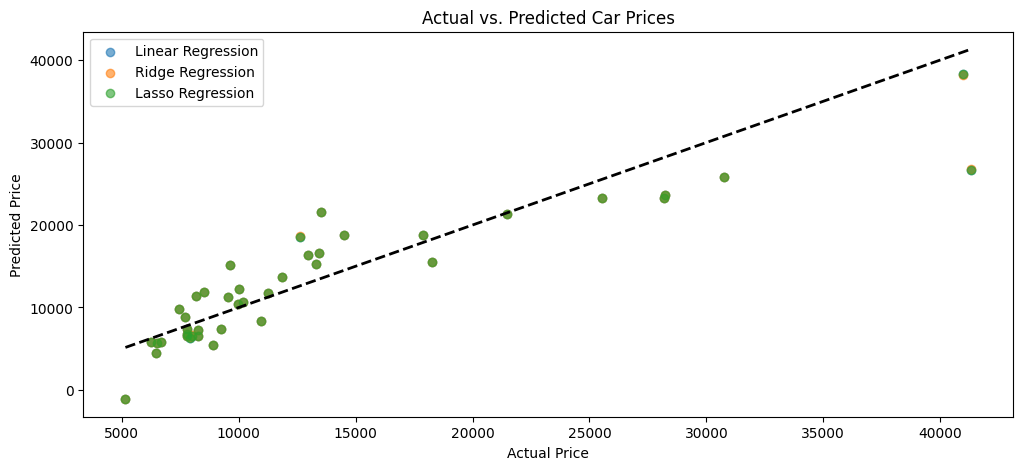

In [45]:


# 7. Visualization
plt.figure(figsize=(12, 5))
plt.scatter(y_test, lr.predict(X_test), label="Linear Regression", alpha=0.6)
plt.scatter(y_test, ridge.predict(X_test), label="Ridge Regression", alpha=0.6)
plt.scatter(y_test, lasso.predict(X_test), label="Lasso Regression", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices")
plt.legend()
plt.show()
